In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#get data from gsheet into dataframe

gsheet = 'https://docs.google.com/spreadsheets/d/18emqLrfu97OreOH3-8z8_IjDoNdj8DrRRxhEbDTBRnY/export?format=csv'
df = pd.read_csv(gsheet)

In [3]:
#replace timestamp with a respondant id and unpivot data into tidy form.

df = df.drop(['Timestamp'],axis=1)
df['respondant_id'] = range(1, len(df) + 1)
df = pd.melt(df,id_vars=['respondant_id']) 
df.columns = ['respondant_id','question','answer']

In [4]:
#get mean answer value per question and left join onto original answers so we can sort by average response

df_mean = df.groupby(['question']).mean()
df_mean = df_mean.drop(['respondant_id'],axis=1)
df_mean.columns = ['mean_answer']
df = df.join(df_mean, on='question' )

In [5]:
#sort by mean answer values

df = df.sort_values(by=['mean_answer'],ascending = False).reset_index(drop=True)

In [6]:
sb.set(style="darkgrid")

[Text(0, 0.5, ''), Text(0.5, 0, " 'On a Scale of 0-5:'")]

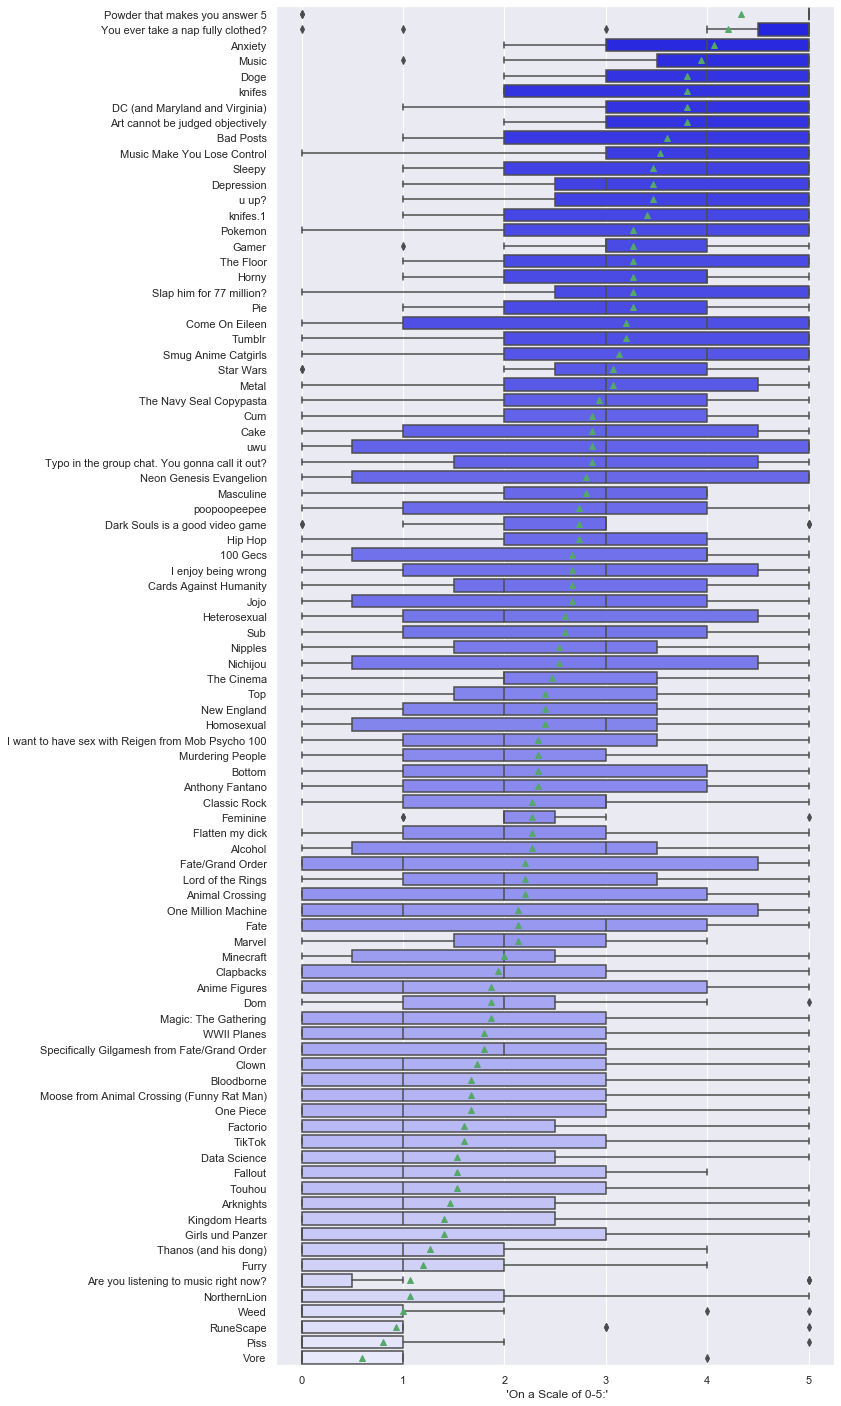

In [7]:
#plotting time

f, ax = plt.subplots(figsize=(10,25)) 
g = sb.boxplot(x = "answer",
               y = "question"
               , hue = "mean_answer"
               , data=df
               , width= .8
               , showmeans=True
               , color="blue"
               , dodge = False)

g.legend_.remove()
ax.set(ylabel="",xlabel=" 'On a Scale of 0-5:'")

In [8]:
f.savefig('survey_box_plot.png'
         ,transparent=True
         ,bbox_inches = 'tight')